## Rukovanje podatcima


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn


### Učitavanje podataka

In [3]:
# Učitavanje podataka
df = pd.read_csv("data/heart_disease_uci.csv")

#### Početni pregled podataka

In [4]:
# Prikaz dimenzija dataframea
df.shape

(920, 16)

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Prikaz svih podataka 
#with pd.option_context("display.max_rows", None, 'display.max_columns', None):
#    display(df)

In [7]:
df.columns.values

array(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'num'], dtype=object)

Pojašnjenja značajki:
- id - ID osobe, tj. primjera 
- age - starost osobe
- sex - spol osobe
- cp - razina boli u prsima (0, 1, 2, 3)
- trestbps - tlak osobe kad je primljena u bolnicu
- chol - razina kolesterola osobe kada je primljena u bolnicu
- fbs - razina šećera u krvi (0, 1)
- restecg - rezultat EKG-a (0, 1, 2)
- thalch - maksimalna vrijednost otkucaja srca zabilježena tijekom primitka u bolnicu
- exang - izaziva li vježba anginu (0, 1)
- oldpeak - stanje depresije
- slope - stanje pacijenta tijekom najveće fizičke aktivnosti/napora
- ca - prikaz rezultata fluoroskopije, koliko su žile obojene (0, 1, 2, 3)
- thal - rezultat testa na talij (0, 1, 2, 3)
- num - značajka oznake/klase


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
# Opis numeričkih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
# Opis svih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe(include = 'all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


#### Monotoni atributi

In [11]:
# Provjera postoje li monotoni atributi, čija vrijednost jednoliko raste
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

Iz ovog prikaza, može se zaključiti da je id monotoni atribut, zbog čega ga možemo izbaciti iz skupa podataka. 

In [12]:
df.drop('id', axis = 1, inplace=True)

Također, dataset značajka nam nije relevantan za predikciju zatajenja srca. 

In [13]:
df.drop('dataset', axis = 1, inplace=True)

#### Nedostajajući podatci 

In [14]:
# Provjera koliko je nedostajajućih podataka
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [15]:
# Postotak nedostajajućih vrijednosti
round((df.isna().sum() / len(df))*100,2)

age          0.00
sex          0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

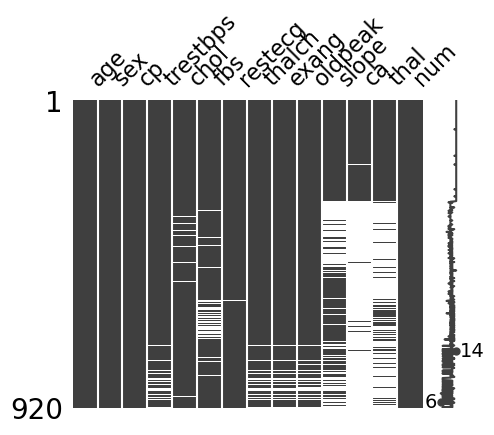

In [16]:
mn.matrix(df,figsize=(5,4));

U idealnom slučaju rješenje za nedostajujuće podatke bilo bi pronalazak točnih vrijednosti iz drugih izvora, međutim, to ovdje nije opcija. Zato ćemo se poslužiti drugim metodama.

U slučaju značajke **trestbps**:
- značajka ima numeričku vrijednost tako da možemo nedostajajuće vrijednosti zamijeniti srednjom vrijednosti
- izbacivanjem tih zapisa gubimo oko 6,5% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, krvni tlak važan je faktor u predviđanju zatajenja srca
- interpolacija nema baš smisla 

/tmp/ipykernel_5369/1080742283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trestbps)
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='trestbps', ylabel='Density'>

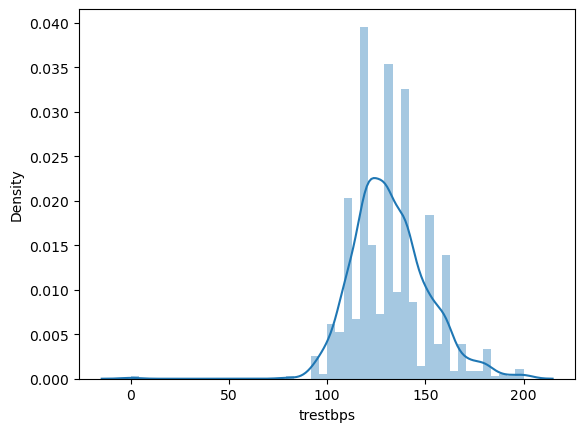

In [17]:
sns.distplot(df.trestbps)

U slučaju značajke **chol**:
- značajka ima numeričku vrijednost tako da možemo nedostajajuće vrijednosti zamijeniti srednjom vrijednosti
- izbacivanjem tih zapisa gubimo oko 3,3% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, kolesterol je važan faktor u predviđanju zatajenja srca
- interpolacija nema smisla

/tmp/ipykernel_5369/1709164173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol)
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

<Axes: xlabel='chol', ylabel='Density'>

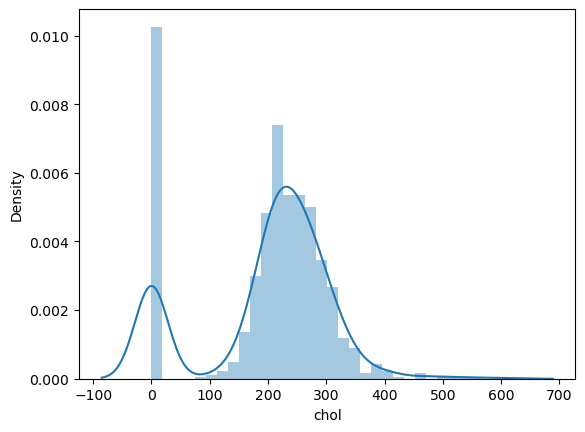

In [18]:
sns.distplot(df.chol)

U slučaju značajke **fbs**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo binarne vrijednosti (0 ili 1)
- izbacivanjem tih zapisa gubimo oko 10% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, razina šećera je važan faktor u predviđanju zatajenja srca
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom 

U slučaju značajke **restecg**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednost 0, 1 ili 2
- izbacivanjem tih zapisa gubimo manje od 1% podataka, a budući da u ovom slučaju izgleda kao da su to MAR/MCAR podatci, najbolja opcija je izbrisati ove zapise.
- izbacivanje značajke nije moguće, ekg je ključan faktor u predviđanju zatajenja srca
- interpolacija nema smisla

U slučaju značajke **thalch**:
- značajka je numerička tako da nedostajajuće vrijednosti možemo zamijeniti srednjom vrijednošću podataka
- izbacivanjem tih zapisa gubimo oko 6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, otkucaji srca važan su faktor u predviđanju zatajenja srca
- interpolacija nema smisla

/tmp/ipykernel_5369/3543623932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.thalch)
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

<Axes: xlabel='thalch', ylabel='Density'>

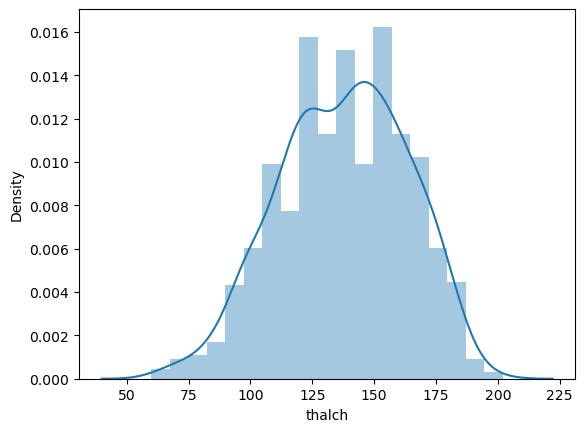

In [19]:
sns.distplot(df.thalch)

U slučaju značajke **exang**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo binarne vrijednosti (0 ili 1)
- izbacivanjem tih zapisa gubimo oko 6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da su angine predstadij infarkta, ne možemo izbaciti ovu značajku
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom 

U slučaju značajke **oldpeak**:
- značajka je numerička tako da nedostajajuće vrijednosti možemo zamijeniti srednom vrijednosti podataka
- izbacivanjem tih zapisa gubimo oko 6,8% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- značajka nije ključna za previđanje zatajenja srca pa ju je moguće i izbaciti
- interpolacija nema smisla

/tmp/ipykernel_5369/1356206634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.oldpeak)
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

<Axes: xlabel='oldpeak', ylabel='Density'>

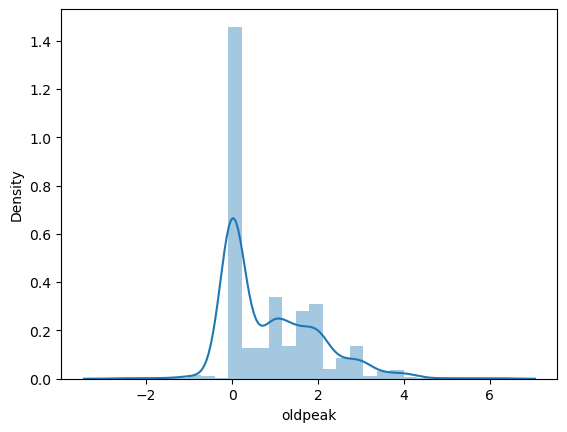

In [20]:
sns.distplot(df.oldpeak)

U slučaju značajke **slope**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima vrijednosti 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 33,6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da ljudi sa zatajenjem srca puno gore podnose napore, ovo je važna značajka koju ne bi bilo pametno izbaciti
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom

U slučaju značajke **ca**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednosti 0, 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 66,5% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da se ovim putem može vidjeti začepljenje krvnih žila, značajka je jako bitna, ali u našem slučaju, uz više od 66% nedostajajućih podataka, možda je moguća i uspješna predikcija bez nje
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom, ali uz upitnu uspješnost s obzirom na malen broja podataka koji imamo dostupan za treniranje

U slučaju značajke **thal**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednosti 0, 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 53% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- kao i kod značajke **ca**, s obzirom na broj nedostajajućih vrijednosti, možda je bolje izbaciti ovu značajku iako ima velik utjecaj na procjenu zatajenja srca 
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom, također uz upitnu korisnost/uspješnost s obzirom na malen skup podataka za treniranje modela

Nakon razmatranja individualnih značajki, a zatim i njihove usporedbe na grafu, moguće je uočiti da značajke **trestbps**, **thalch**, **exang** i **oldpeak** imaju skoro jednak broj nedostajajućih značajki na istim mjestima, zbog čega je možda najbolje rješenje izbaciti te zapise, ali čisto vježbe radi, pokušat ću nadopuniti vrijednosti nedostajajućih podataka.

U idućoj fazi projekta, kada budem trenirala modele, mogu provjeriti točnost na različitim skupovima podataka, ovisno o tome jesam li izbacila određene zapise/značajke ili sam im nadopunila vrijednosti.


In [21]:
df2 = df.copy()

# trestbps - ubacivanje srednje vrijednosti gdje nedostaju podatci
df2.loc[df2.trestbps.isna(),'trestbps'] = df2.loc[:,'trestbps'].mean()

# chol - ubacivanje srednje vrijednosti
df2.loc[df2.chol.isna(),'chol'] = df2.loc[:,'chol'].mean()

# fbs - zamjena najčešće korištenom vrijednošću ili predikcija uz KNN ili LR
mode_val = df2[df2.fbs.notna()]['fbs'].mode()[0]
df2['fbs'] = df2['fbs'].fillna(mode_val)
         
# restecg - brisanje zapisa koji sadržavaju nedostajajuće vrijednosti 
df2 = df2.loc[df2.restecg.notnull(), :] 
  
# thalch - ubacivanje srednje vrijednosti    
df2.loc[df2.thalch.isna(),'thalch'] = df2.loc[:,'thalch'].mean()

# oldpeak - izbacivanje ili srednja vrijednost 
df2.loc[df2.oldpeak.isna(),'oldpeak'] = df2.loc[:,'oldpeak'].mean() 
#df2.drop(['oldpeak'], axis=1, inplace=True)   


In [22]:
# exang - zamjena, ili predikcija uz knn, LR  
# Tu ću napraviti predikciju uz KNN, koristeći samo numeričke značajke
df_knn = df2[['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'num']] 

cols = ['exang', 'num']

# Definiranje KNN imputera sa susjedima
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

knn.fit_transform(df_knn[cols])
df_wcols = pd.DataFrame(knn.transform(df_knn[cols]),columns=['exang', 'num'])

print(df_wcols)

df2['exang'] = df_wcols['exang']

     exang  num
0      0.0  0.0
1      1.0  2.0
2      1.0  1.0
3      0.0  0.0
4      0.0  0.0
..     ...  ...
913    0.0  1.0
914    0.0  0.0
915    0.0  2.0
916    0.0  0.0
917    1.0  1.0

[918 rows x 2 columns]


In [23]:
df2 = df2.loc[df2.exang.notnull(), :]
df2.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       306
ca          607
thal        482
num           0
dtype: int64

In [24]:
#ca - zamjena ili predikcija uz KNN, LR ili izbacivanje značajke   
#Tu ću napraviti predikciju uz Linear Regression
df_lr = df2[['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'num']]

train_data = df_lr[df_lr['ca'].notna()]
test_data = df_lr[df_lr['ca'].isnull()]

X_train= train_data.drop('ca',axis=1)
y_train = train_data['ca']

X_test = test_data.drop('ca',axis=1)
y_test = test_data['ca']
print(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

     age    trestbps   chol    fbs      thalch  exang   oldpeak  num
166   52  138.000000  223.0  False  169.000000    0.0  0.000000    0
192   43  132.000000  247.0   True  143.000000    1.0  0.100000    1
287   58  125.000000  220.0  False  144.000000    0.0  0.400000    0
302   38  138.000000  175.0  False  173.000000    0.0  0.000000    0
303   28  130.000000  132.0  False  185.000000    0.0  0.000000    0
..   ...         ...    ...    ...         ...    ...       ...  ...
913   62  158.000000  170.0  False  138.000000    0.0  0.000000    1
914   46  134.000000  310.0  False  126.000000    0.0  0.000000    2
915   54  127.000000  333.0   True  154.000000    0.0  0.000000    1
916   62  132.132404  139.0  False  137.528389    0.0  0.880607    0
917   55  122.000000  223.0   True  100.000000    1.0  0.000000    2

[607 rows x 8 columns]


array([ 2.24714936e-01,  4.46221908e-01,  4.40858342e-01, -1.94489745e-01,
       -4.54285342e-01, -3.98244533e-01, -4.71957433e-01, -5.57103782e-01,
       -2.71313472e-01, -2.48755347e-01, -2.47585637e-01, -3.32127757e-01,
       -2.49243704e-01, -2.67329661e-01, -3.62577107e-01, -1.73640679e-01,
       -2.02801341e-01, -3.15043796e-01, -1.93329152e-01, -3.27858476e-01,
       -1.77161027e-01, -1.00314411e-01, -2.14501678e-01, -3.04157169e-01,
       -1.86462840e-01, -2.19176227e-01, -1.82299536e-01, -2.54698796e-01,
       -2.13095263e-01, -1.53351260e-01, -1.93681123e-01, -1.56091243e-01,
       -2.12820246e-01, -2.52394137e-01, -4.63875139e-02, -6.80773861e-02,
       -2.04513216e-01, -1.17616383e-01, -1.81787005e-01, -4.28643686e-01,
       -8.04372575e-02, -1.99740763e-02, -8.39360842e-02, -1.52056297e-01,
       -1.15605957e-01, -1.32578139e-01, -1.32988175e-01, -9.86139096e-02,
       -1.25814184e-01, -1.67284196e-02, -4.57652299e-02, -8.86167040e-02,
       -3.49536641e-02, -

In [25]:
a = y_train.to_list()
b = list(y_pred)
a.extend(b)

df2['ca'] = a



In [26]:
#thal i slope- zamjena ili predikcija uz KNN, LR ili izbacivanje značajke
# Ove dvije značajke ću za sada izbaciti. 

df2.drop(['thal'], axis=1, inplace=True)
df2.drop(['slope'], axis=1, inplace=True)

df2.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64

Uspjeli smo se riješiti nedostajajućih podataka. 

#### Stršeći podatci

In [27]:
df2.describe()

,age,trestbps,chol,thalch,exang,oldpeak,ca,num
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.516376,132.155764,198.980251,137.577001,0.382314,0.881569,0.635543,0.996725
std,9.417734,18.469286,108.762187,25.144351,0.477326,1.055033,0.721913,1.144715
min,28.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,-0.557104,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.000000,0.800000,0.427788,1.000000
75%,60.000000,140.000000,266.250000,156.000000,1.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Na temelju ovog ispisa, može se uočiti nekoliko potencijalnih stršećih vrijednosti. **trestbps**, **chol**, **oldpeak**, **ca** i **num** svi imaju neobično visoke maksimalne vrijednosti.

Sada za svaku od značajki možemo proučiti outliere pomoću vizualizacije. 

/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


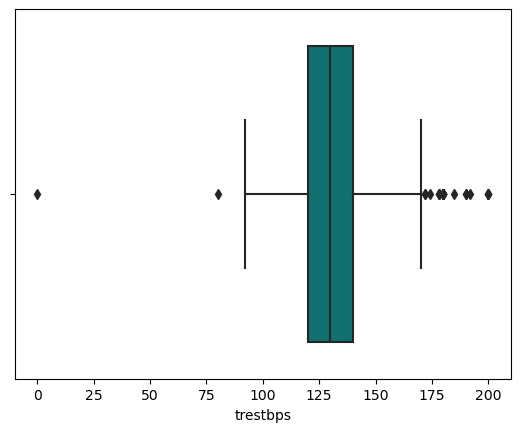

In [28]:
sns.boxplot(x = df2['trestbps'], color = 'teal')
plt.show()

Očito je da postoji više stršećih vrijednosti. Možemo ih malo detaljnije proučiti.

In [29]:
# Prvo za visoke vrijednosti 
print(f'trestbps > 160: {(df2.trestbps>160).sum()}')
print(f'trestbps > 170: {(df2.trestbps>170).sum()}')
print(f'trestbps > 180: {(df2.trestbps>180).sum()}')
print(f'trestbps > 190: {(df2.trestbps>190).sum()}')

trestbps > 160: 43
trestbps > 170: 26
trestbps > 180: 8
trestbps > 190: 5


Postoji dosta zapisa visoke vrijednosti, a nema potrebe da ih uklanjam bez dobrog razloga. Sada možemo provjeriti isto za outliere nižih vrijednosti.


In [30]:
print(f'trestbps < 85: {(df2.trestbps<85).sum()}')
print(f'trestbps < 80: {(df2.trestbps<80).sum()}')

df2.loc[df2.trestbps < 85, 'trestbps']

trestbps < 85: 2
trestbps < 80: 1


644    80.0
753     0.0
Name: trestbps, dtype: float64

S obzirom da postoje samo 2 zapisa ispod donje granice, možemo ih proglasiti stršećim vrijednostima, međutim, za sada ih je nepotrebno brisati.

Isto ćemo ponoviti za ostale koji imaju potencijala. 

/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


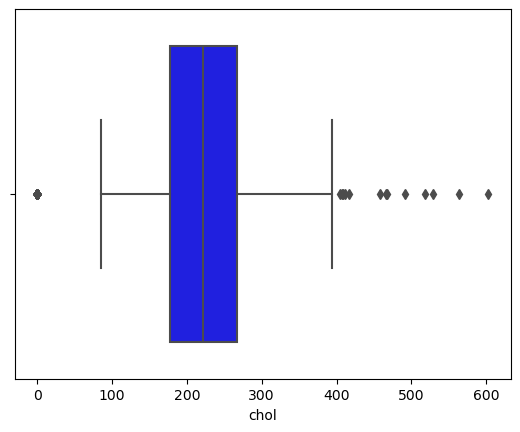

In [31]:
sns.boxplot(x = df2['chol'], color = 'blue')
plt.show()

In [32]:
print(f'chol < 85: {(df2.chol<50).sum()}')
print(f'chol == 0: {(df2.chol==0).sum()}')
print(f'chol > 350: {(df2.chol>350).sum()}')
print(f'chol > 370: {(df2.chol>370).sum()}')
print(f'chol > 390: {(df2.chol>390).sum()}')
print(f'chol > 410: {(df2.chol>410).sum()}')
print(f'chol > 450: {(df2.chol>450).sum()}')

chol < 85: 171
chol == 0: 171
chol > 350: 26
chol > 370: 19
chol > 390: 17
chol > 410: 10
chol > 450: 8


Postoji 171 nul vrijednost i preko 20 zapisa većih od 'gornje granice'

/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


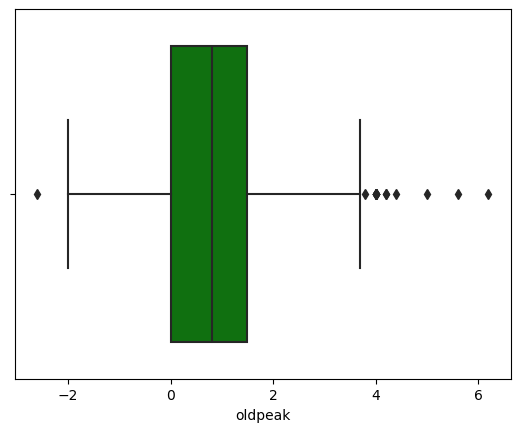

In [33]:
sns.boxplot(x = df2['oldpeak'], color = 'green')
plt.show()

In [34]:
print(f'oldpeak < -2: {(df2.oldpeak < -2).sum()}')
print(f'oldpeak > 3.5: {(df2.oldpeak > 3.5).sum()}')
print(f'oldpeak > 3.8: {(df2.oldpeak > 3.8).sum()}')
print(f'oldpeak > 4.0: {(df2.oldpeak > 4.0).sum()}')
print(f'oldpeak > 5.0: {(df2.oldpeak > 5.0).sum()}')
print(f'oldpeak > 6.0: {(df2.oldpeak > 6.0).sum()}')

oldpeak < -2: 1
oldpeak > 3.5: 20
oldpeak > 3.8: 14
oldpeak > 4.0: 6
oldpeak > 5.0: 2
oldpeak > 6.0: 1


/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


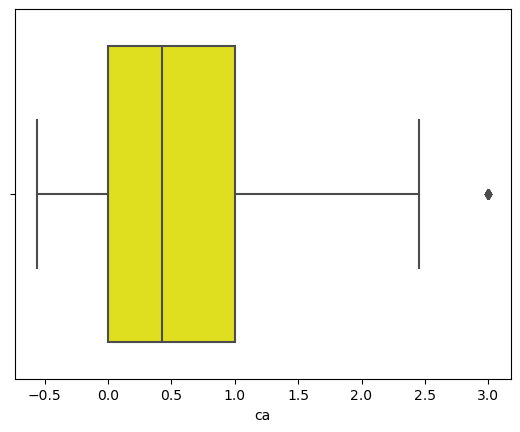

In [35]:
sns.boxplot(x = df2['ca'], color = 'yellow')
plt.show()

In [36]:
print(f'ca > 2.5: {(df2.ca > 2.5).sum()}')

ca > 2.5: 20


/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


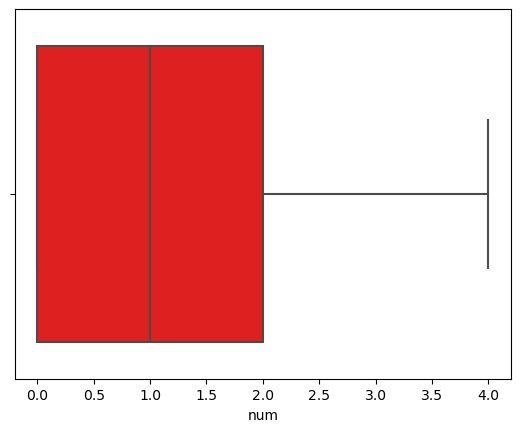

In [37]:
sns.boxplot(x = df2['num'], color = 'red')
plt.show()

In [38]:
print(f'num > 4.0: {(df2.num > 4.0).sum()}')

num > 4.0: 0


Nema stršećih vrijednosti.

# Vizualizacija podataka

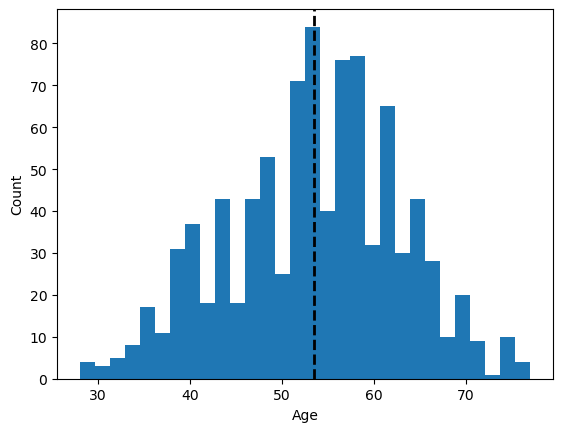

In [39]:
# Prikaz godina ispitanika
plt.hist(df2.age, bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(df2.age.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

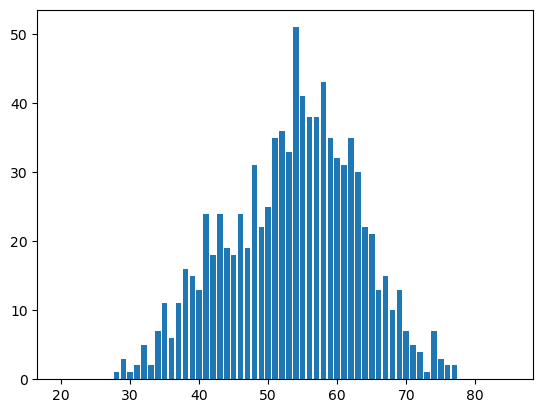

In [40]:
count_per_sex = df['age'].value_counts()

labels = count_per_sex.index
sizes = count_per_sex.values

plt.bar(labels, sizes)
plt.axis('equal') 
plt.show()


In [41]:
df2.groupby('age').count()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num
age,,,,,,,,,,,
28,1,1,1,1,1,1,1,1,1,1,1
29,3,3,3,3,3,3,3,3,3,3,3
30,1,1,1,1,1,1,1,1,1,1,1
31,2,2,2,2,2,2,2,2,2,2,2
32,5,5,5,5,5,5,5,5,5,5,5
33,2,2,2,2,2,2,2,2,2,2,2
34,6,6,6,6,6,6,6,6,6,6,6
35,11,11,11,11,11,11,11,11,11,11,11
36,6,6,6,6,6,6,6,6,6,6,6


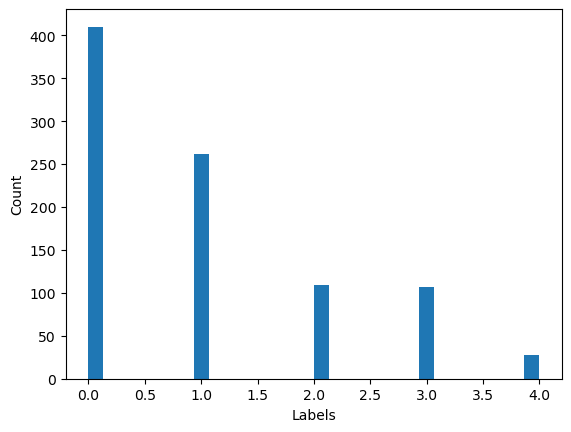

In [42]:
# Prikaz broja izlaznih oznaka
plt.hist(df2.num, bins=30)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

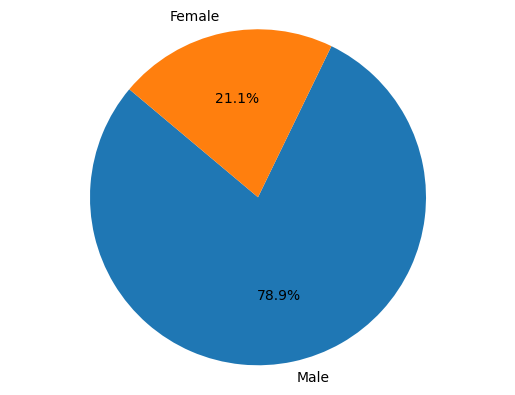

In [43]:
# Dijagram rasporedbe spola

count_per_sex = df['sex'].value_counts()

labels = count_per_sex.index
sizes = count_per_sex.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()


In [44]:
# Opis značajke koja opisuje spol
df2.groupby('sex').describe().transpose()

sex            Female        Male
age count  194.000000  722.000000
    mean    52.474227   53.796399
    std      9.496214    9.383424
    min     30.000000   28.000000
    25%     46.000000   47.000000
...               ...         ...
num min      0.000000    0.000000
    25%      0.000000    0.000000
    50%      0.000000    1.000000
    75%      1.000000    2.000000
    max      4.000000    4.000000

[64 rows x 2 columns]

Sada bi bilo dobro pokazati korelaciju svih značajki sa izlaznom oznakom. Prvo ću opisati sve značajke, a zatim odrediti korelaciju za numeričke.

In [45]:
df2.describe()

,age,trestbps,chol,thalch,exang,oldpeak,ca,num
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.516376,132.155764,198.980251,137.577001,0.382314,0.881569,0.635543,0.996725
std,9.417734,18.469286,108.762187,25.144351,0.477326,1.055033,0.721913,1.144715
min,28.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,-0.557104,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.000000,0.800000,0.427788,1.000000
75%,60.000000,140.000000,266.250000,156.000000,1.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Mogu prikazati i spol kao numeričku varijablu.

In [46]:
df2.replace({'Male': 1, 'Female': 0}, inplace=True)
df2.describe()

,age,sex,trestbps,chol,thalch,exang,oldpeak,ca,num
count,916.000000,916.00000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.516376,0.78821,132.155764,198.980251,137.577001,0.382314,0.881569,0.635543,0.996725
std,9.417734,0.40880,18.469286,108.762187,25.144351,0.477326,1.055033,0.721913,1.144715
min,28.000000,0.00000,0.000000,0.000000,60.000000,0.000000,-2.600000,-0.557104,0.000000
25%,47.000000,1.00000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.00000,130.000000,221.000000,138.000000,0.000000,0.800000,0.427788,1.000000
75%,60.000000,1.00000,140.000000,266.250000,156.000000,1.000000,1.500000,1.000000,2.000000
max,77.000000,1.00000,200.000000,603.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [52]:
correlation_df=df2.corr(numeric_only=True).abs()[["num"]]
correlation_df

,num
age,0.341186
sex,0.260086
trestbps,0.116370
chol,0.227614
fbs,0.132302
thalch,0.351895
exang,0.313520
oldpeak,0.422549
ca,0.488172
num,1.000000


Iz ovog ispisa je moguće uočiti da neke značajke poput **ca** i **oldpeak** ima veliku korelaciju sa izlaznom oznakom dok najmanju korelaciju imaju **trestbps** i **fbs**. To možemo i vizualizirati heatmap korelacijom.

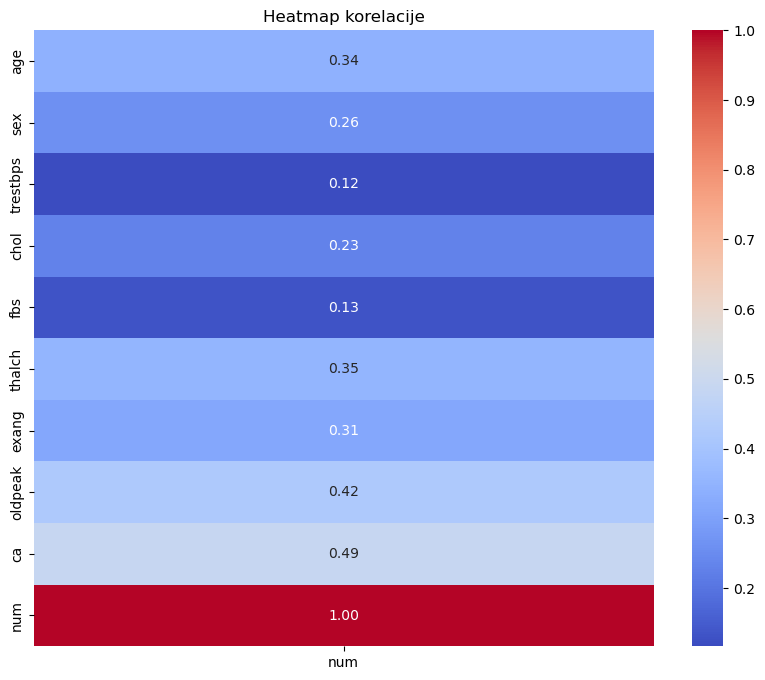

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelacije')
plt.show()


Nadalje, možemo prikazati korelaciju **oldpeak** i **ca** značajke o izlaznoj varijabli

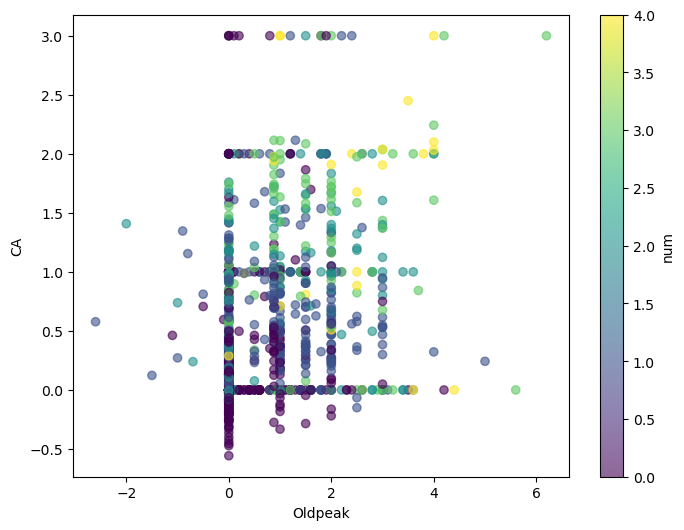

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['oldpeak'], df2['ca'], c=df2['num'], cmap='viridis', alpha=0.6)
plt.colorbar(label='num')
plt.xlabel('Oldpeak')
plt.ylabel('CA')
plt.show()


Prikaz predviđanja zatajenja srca u ovisnosti o godinama ispitanika.

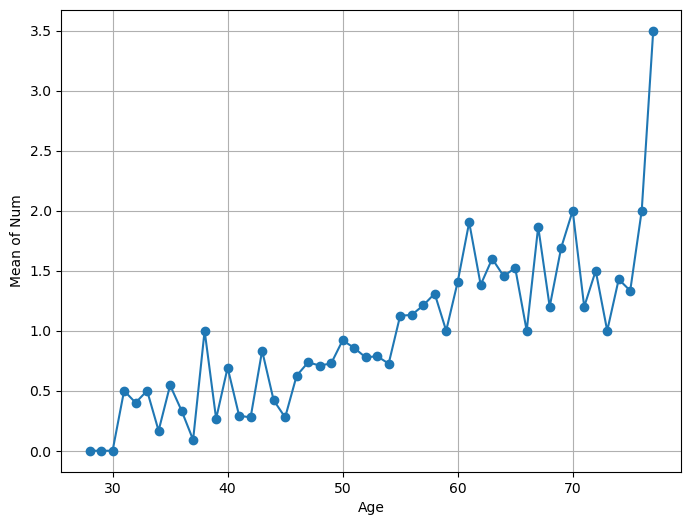

In [61]:
age_grouped = df2.groupby('age')['num'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.plot(age_grouped['age'], age_grouped['num'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Mean of Num')
plt.grid(True)
plt.show()


/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

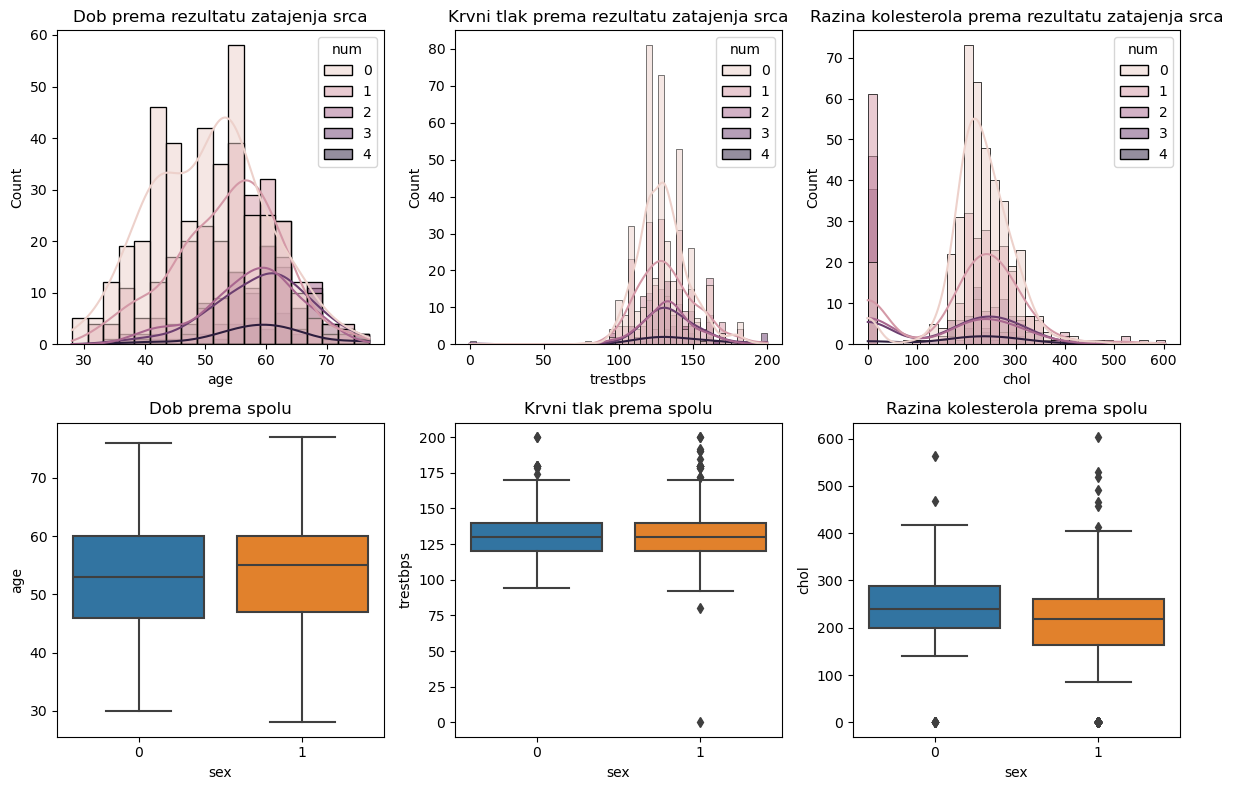

In [65]:
# Histogrami prema rezultatima zatajenja srca
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(data=df2, x='age', hue='num', kde=True)
plt.title('Dob prema rezultatu zatajenja srca')

plt.subplot(2, 3, 2)
sns.histplot(data=df2, x='trestbps', hue='num', kde=True)
plt.title('Krvni tlak prema rezultatu zatajenja srca')

plt.subplot(2, 3, 3)
sns.histplot(data=df2, x='chol', hue='num', kde=True)
plt.title('Razina kolesterola prema rezultatu zatajenja srca')

# Box plotovi prema spolu
plt.subplot(2, 3, 4)
sns.boxplot(data=df2, x='sex', y='age')
plt.title('Dob prema spolu')

plt.subplot(2, 3, 5)
sns.boxplot(data=df2, x='sex', y='trestbps')
plt.title('Krvni tlak prema spolu')

plt.subplot(2, 3, 6)
sns.boxplot(data=df2, x='sex', y='chol')
plt.title('Razina kolesterola prema spolu')

plt.tight_layout()
plt.show()


Očito je da kolesterol i krvni tlak imaju dosta nul-vrijednosti koje utječu na izgled grafova. Treba ispitati što one znače, zašto su nula i prema tome nadopuniti ili izbrisati te vrijednosti. 


Možemo prikazati i udio ženskih i muških primjera po izlaznoj oznaci, kao i broj muških i ženskih primjera po izlaznoj oznaci.

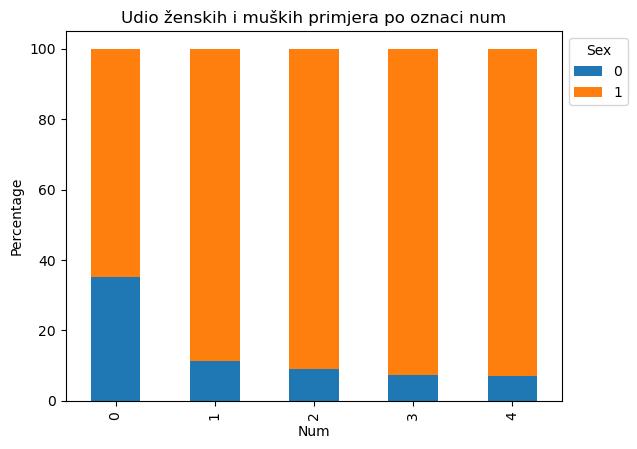

In [80]:

sex_num_count = df2.groupby(['num', 'sex']).size().unstack()
sex_num_count['total'] = sex_num_count.sum(axis=1)
sex_num_percentage = sex_num_count.div(sex_num_count['total'], axis=0) * 100

sex_num_percentage = sex_num_percentage.drop(columns='total')
sex_num_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Num')
plt.ylabel('Percentage')
plt.title('Udio ženskih i muških primjera po oznaci num')
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1,1))
plt.show()



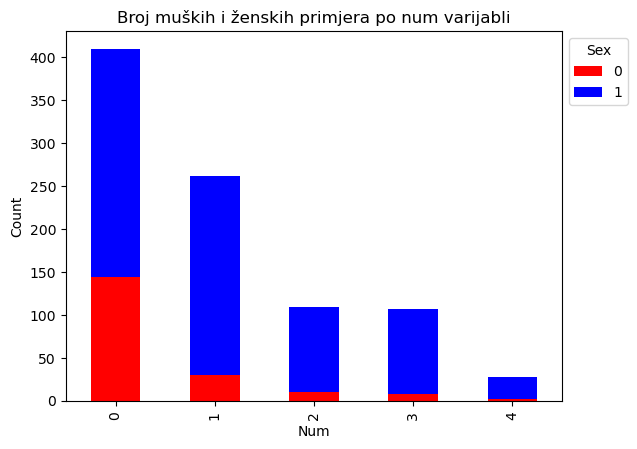

In [92]:

sex_num_count = df2.groupby(['num', 'sex']).size().unstack()

sex_num_count.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.xlabel('Num')
plt.ylabel('Count')
plt.title('Broj muških i ženskih primjera po num varijabli')
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1,1))
plt.show()
